In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/GBC/Winter 2025/Capstone/Data/stock_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6112 entries, 0 to 6111
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Symbol          6112 non-null   object 
 1   Company Name    6112 non-null   object 
 2   Sector          6112 non-null   object 
 3   Industry        6112 non-null   object 
 4   Start Date      6112 non-null   object 
 5   Last Update     6112 non-null   object 
 6   Start Price     6112 non-null   float64
 7   Current Price   6112 non-null   float64
 8   YTD Change      6112 non-null   float64
 9   Market Cap      6111 non-null   object 
 10  P/E Ratio       6111 non-null   float64
 11  Dividend Yield  4234 non-null   float64
 12  Average Volume  6112 non-null   int64  
 13  Year High       6112 non-null   float64
 14  Year Low        6112 non-null   float64
 15  Index           6112 non-null   object 
 16  Revenue         944 non-null    object 
 17  Unnamed: 15     0 non-null      f

In [4]:
df = df.drop(columns=['Unnamed: 15', 'c'])

In [5]:
df.head()

,Symbol,Company Name,Sector,Industry,Start Date,Last Update,Start Price,Current Price,YTD Change,Market Cap,P/E Ratio,Dividend Yield,Average Volume,Year High,Year Low,Index,Revenue
0,AMZN,Amazon,Retailing,Retailing,1/1/2015,12/31/2015,15.43,33.79,1.1907,2.30T,35.470116,NaN,75960476,34.82,14.26,DOW30,NaN
1,NVDA,Nvidia,Information technology,Information technology,1/1/2015,12/31/2015,0.48,0.80,0.6645,3.33T,30.564445,0.0003,310268111,0.83,0.45,DOW30,NaN
2,NKE,Nike,Clothing industry,Clothing industry,1/1/2015,12/31/2015,42.35,56.30,0.3294,105.31B,28.073051,0.0208,7610102,61.43,40.42,DOW30,NaN
3,CRM,Salesforce,Information technology,Information technology,1/1/2015,12/31/2015,58.91,77.96,0.3234,304.18B,28.306879,0.0048,4153068,82.44,54.64,DOW30,NaN
4,MCD,McDonald's,Food industry,Food industry,1/1/2015,12/31/2015,72.32,94.77,0.3104,202.31B,22.473152,0.0251,6505149,96.45,68.84,DOW30,NaN


In [6]:
df.describe()

,Start Price,Current Price,YTD Change,P/E Ratio,Dividend Yield,Average Volume,Year High,Year Low
count,6112.000000,6112.000000,6112.000000,6111.000000,4234.000000,6.112000e+03,6112.000000,6112.000000
mean,120.604823,138.578827,0.180224,-3.685765,0.023285,8.772726e+06,158.698210,99.189031
std,232.277806,280.079240,0.399901,682.492010,0.015203,3.590372e+07,314.170997,196.399241
min,0.220000,0.340000,-0.888400,-16848.440000,0.000200,1.590000e+02,0.360000,0.220000
25%,38.500000,42.350000,-0.033925,13.561994,0.011400,1.284376e+06,48.950000,31.427500
50%,70.160000,78.970000,0.142700,19.022161,0.020600,2.572353e+06,90.210000,58.820000
75%,133.607500,150.240000,0.339925,27.104715,0.032700,5.768568e+06,171.160000,110.180000
max,6969.000000,8178.900000,7.350400,1108.817000,0.105300,6.858664e+08,9964.770000,6800.000000


In [7]:
df.isnull().sum()

Symbol               0
Company Name         0
Sector               0
Industry             0
Start Date           0
Last Update          0
Start Price          0
Current Price        0
YTD Change           0
Market Cap           1
P/E Ratio            1
Dividend Yield    1878
Average Volume       0
Year High            0
Year Low             0
Index                0
Revenue           5168
dtype: int64

In [9]:
df ['Start Date'] = pd.to_datetime(df['Start Date'])
df ['Year'] = df['Start Date'].dt.year
df ['Dividend Yield'] = pd.to_numeric(df['Dividend Yield'], errors = 'coerce')

def convert_market_cap(val):
    if isinstance(val, str):
        val = val.replace('$', '').replace(',', '')
        if 'T' in val:
            return float(val.replace('T', '')) * 1e12
        elif 'B' in val:
            return float(val.replace('B', '')) * 1e9
        elif 'M' in val:
            return float(val.replace('M', '')) * 1e6
        else:
            try:
                return float(val)
            except ValueError:
                return pd.to_numeric(val, errors='coerce')
    return val
def convert_revenue(val):
    if isinstance(val,str):
        val = val.replace('$', '').replace(',', '')
        if 'T' in val:
            return float(val.replace('T', '').replace(',', '')) * 1e12
        elif 'B' in val:
            return float(val.replace('B', '').replace(',', '')) * 1e9
        elif 'M' in val:
            return float(val.replace('M', '').replace(',', '')) *1e6
        else:
            return pd.to_numeric(val, errors = 'coerce')
    return val
df['Market Cap'] = df['Market Cap'].apply(convert_market_cap)
df['Revenue'] = df['Revenue'].apply(convert_revenue)

In [57]:
def impute_sector_year_average(df, columns):
    for column in columns:
        df[column] = df[column].fillna(df.groupby(['Sector', 'Year'])[column].transform('mean'))
        df[column] = df[column].fillna(df[column].mean())

column_to_impute = ['Market Cap', 'P/E Ratio', 'Dividend Yield']
impute_sector_year_average(df, column_to_impute)

In [58]:
df.head()

,Symbol,Company Name,Sector,Industry,Start Date,Last Update,Start Price,Current Price,YTD Change,Market Cap,...,Revenue,Year,log_Market Cap,log_Revenue,log_P/E Ratio,log_Start Price,log_Current Price,winsorized_P/E Ratio,winsorized_Dividend Yield,winsorized_YTD Change
0,AMZN,Amazon,Retailing,Retailing,2015-01-01,12/31/2015,15.43,33.79,0.7309,2.300000e+12,...,NaN,2015,28.463930,NaN,3.596493,2.799109,3.549330,35.470116,0.0099,0.7309
1,NVDA,Nvidia,Information technology,Information technology,2015-01-01,12/31/2015,0.48,0.80,0.6645,3.330000e+12,...,NaN,2015,28.833993,NaN,3.452031,0.392042,0.587787,30.564445,0.0052,0.6645
2,NKE,Nike,Clothing industry,Clothing industry,2015-01-01,12/31/2015,42.35,56.30,0.3294,1.053100e+11,...,NaN,2015,25.380174,NaN,3.369812,3.769307,4.048301,28.073051,0.0208,0.3294
3,CRM,Salesforce,Information technology,Information technology,2015-01-01,12/31/2015,58.91,77.96,0.3234,3.041800e+11,...,NaN,2015,26.440885,NaN,3.377822,4.092843,4.368941,28.306879,0.0052,0.3234
4,MCD,McDonald's,Food industry,Food industry,2015-01-01,12/31/2015,72.32,94.77,0.3104,2.023100e+11,...,NaN,2015,26.033067,NaN,3.155857,4.294833,4.561949,22.473152,0.0251,0.3104


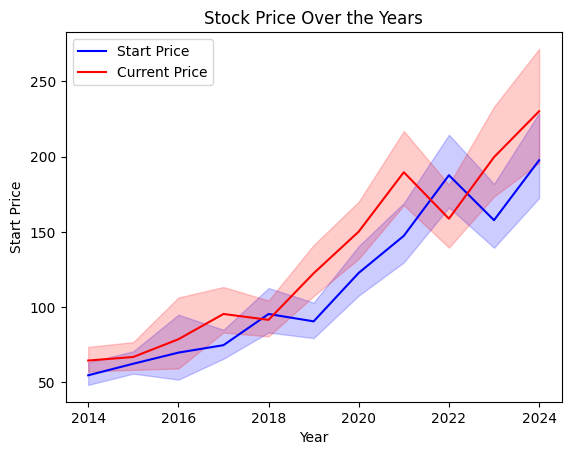

In [59]:
plt.figsize= (10,6)
sns.lineplot(x = 'Year', y = 'Start Price', data=df, label = 'Start Price', color = 'blue')
sns.lineplot(x = 'Year', y = 'Current Price', data=df, label = 'Current Price', color = 'red')
plt.title('Stock Price Over the Years')
plt.legend()
plt.show()

## Stock Price Trends Over the Years

- **Yearly Growth Pattern**:  
  - The upward trend suggests that the stock has generally **appreciated year-over-year**.  

- **Volatility & Uncertainty**:  
  - The **shaded regions** indicate uncertainty or variability in prices.  
  - **Higher fluctuations post-2018** suggest increased market uncertainty.  

- **Key Crossovers & Trends**:  
  - **2018 Onwards**: The red line (current price) moves above the blue line consistently, indicating **strong annual gains**.  
  - **2022 Dip**: A period where the **end-of-year price drops**, possibly due to market corrections or external factors.  

- **Recent Surge (2023-2024)**:  
  - The **end-of-year prices (current price)** are significantly higher than the **start-of-year prices**.  
  - This indicates **strong momentum and investor confidence in recent years**.  

### Key Takeaways  
- The stock has demonstrated **consistent annual growth**, meaning most years ended higher than they started.  
- **Market volatility exists**, but overall **positive trends dominate**.  
- The **latest surge (2023-2024)** suggests strong market performance, though future stability should be monitored.  


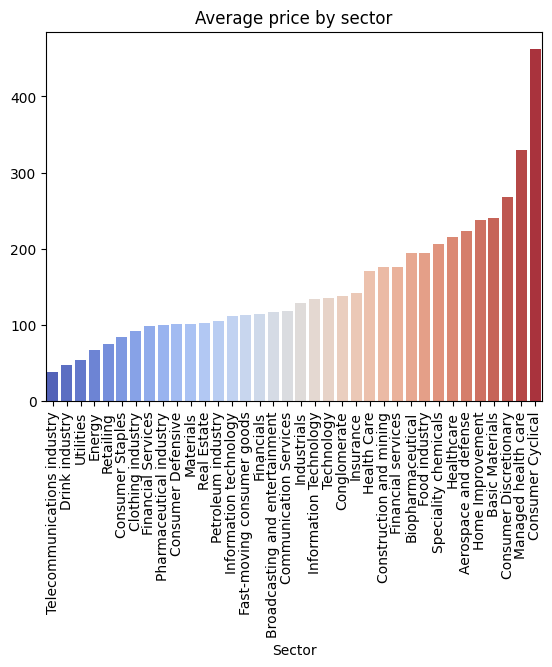

In [60]:
plt.figsize = (10,6)
sector_average_price = df.groupby('Sector')['Current Price'].mean().sort_values()
sns.barplot(x=sector_average_price.index, y=sector_average_price.values, hue=sector_average_price.index, palette='coolwarm', legend=False)
plt.title('Average price by sector')
plt.xticks(rotation = 90)
plt.show()

## Average Price by Sector
- **Top Performing Sectors**:
  - **Consumer Cyclical and Managed Healthcare** have the highest average prices, indicating strong market valuation.
  - Other high-performing sectors include **Retailing, Aerospace & Defense, and Home Improvement**.

- **Moderate Performance**:
  - Sectors such as **Technology, Industrials, and Biopharma** show steady growth.
  - **Information Technology and Construction** remain in the mid-range.

- **Lowest Performing Sectors**:
  - **Telecommunications, Utilities, and Energy** have the lowest average prices.
  - **Drink and Retailing** also rank lower, reflecting lower investor valuation in these industries.
### Key Takeaways
- **Consumer Cyclical and Managed Healthcare** sectors have the **highest average prices**, indicating strong investor confidence.  
- **Technology, Industrials, and Biopharma** show **moderate growth**, reflecting steady market performance.  
- **Telecommunications, Utilities, and Energy** sectors have the **lowest average prices**, suggesting stability but slower growth.  
- **Higher-priced sectors** often represent strong earnings potential, while **lower-priced sectors** may indicate consistent but slow-moving industries.  

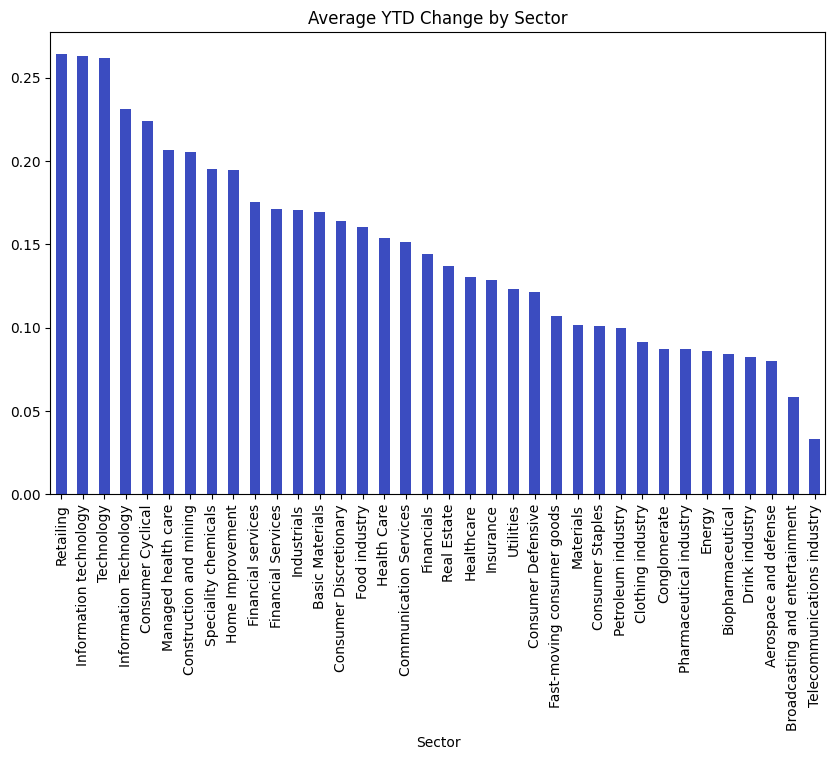

In [65]:
sector_growth = df.groupby('Sector')['YTD Change'].mean().sort_values(ascending=False)
sector_growth.plot(kind='bar', figsize=(10,6), colormap='coolwarm')
plt.title('Average YTD Change by Sector')
plt.show()


 ## Average YTD Change by Sector
- **Top Performing Sectors**:
  - **Retailing and Technology** show the highest YTD growth, indicating strong consumer spending and tech sector expansion.
  - **Information Technology and Consumer Cyclical** sectors are also performing well.

- **Moderate Performance**:
  - **Industrials, Financials, and Healthcare** sectors show steady growth.

- **Lowest Performing Sectors**:
  - **Telecommunications, Broadcasting, and Utilities** have the lowest YTD changes, reflecting stability but slower growth.
  - **Defense and Energy sectors** also show relatively low growth.
### Key Takeaway  
- High-growth sectors like **Technology and Retailing** drive market expansion 
- **Traditional industries provide stability** with moderate or low growth.
- Investors should balance between **growth opportunities and defensive sectors** to manage risk effectively. 


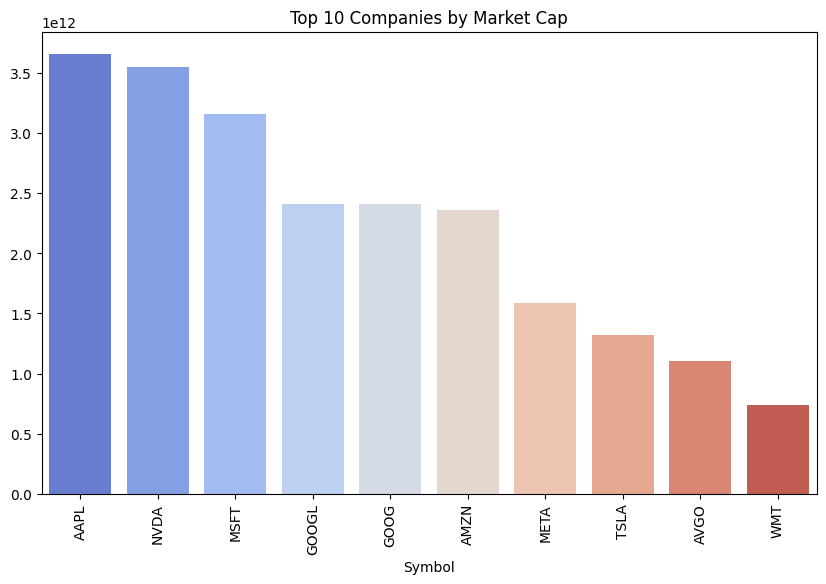

In [68]:

top_company = df.groupby('Symbol')['Market Cap'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_company.index, y=top_company.values, hue=top_company.index, palette='coolwarm', legend=False)
plt.title('Top 10 Companies by Market Cap')
plt.xticks(rotation=90)
plt.show()


## Top 10 Companies by Market Cap - Analysis

### Tech Giants Dominate
- **Apple, Microsoft, and Nvidia** each surpassing **$3 Trillion** in market cap show their massive influence.
- **Google and Amazon** are not far behind, each at approximately **$2.5 Trillion**.
- These five companies alone **represent a significant portion of the total market value**.

### AI & Cloud Computing Are Driving Growth
- **Nvidia’s meteoric rise** is fueled by AI-driven demand for GPUs.
- **Microsoft, Google, and Amazon** are leaders in **cloud computing**, a major revenue driver.
- **Meta** is heavily investing in **AI and metaverse technologies**, pushing its valuation higher.

### 3️⃣ Traditional Companies Still Hold Strong
- **Walmart's** presence shows that **retail still competes**, even in a tech-dominated landscape.

### Key Takeways
- The stock market is increasingly dominated by a handful of **tech companies**, driven by AI, cloud computing, and digital transformation.
- **Nvidia’s growth is remarkable**, showing the power of AI in reshaping industries.
- While tech leads, **diversification remains key**, as traditional sectors like retail and manufacturing still play critical roles.

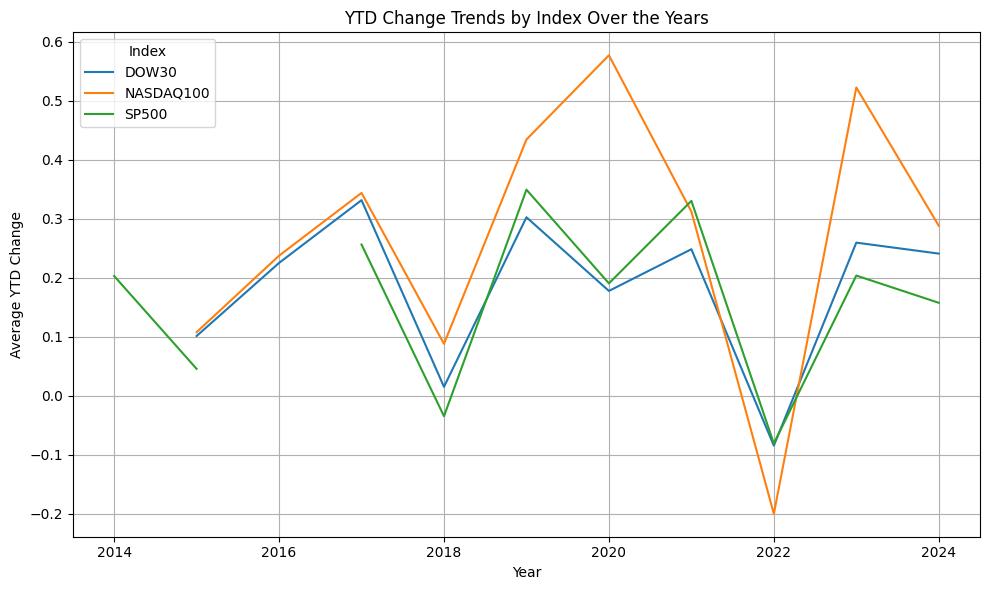

In [18]:
indices = ['DOW30', 'NASDAQ100', 'SP500']
df_filtered = df[df['Index'].isin(indices)]

# Step 2: Group by 'Year' and 'Index' and calculate the average YTD Change
index_trends = df_filtered.groupby(['Year', 'Index'])['YTD Change'].mean().unstack()

# Step 3: Plot the trends
index_trends.plot(figsize=(10, 6))

plt.title('YTD Change Trends by Index Over the Years')
plt.xlabel('Year')
plt.ylabel('Average YTD Change')
plt.grid(True)

plt.tight_layout()
plt.show()


## YTD Change Trends by Index Over the Years
- The graph tracks the **Year-to-Date (YTD) change trends** for **DOW30, NASDAQ100, and SP500** from 2014 to 2024.

### 2018 & 2022 Downturns
- **2018 Market Decline**:
  - A significant dip occurred due to **Federal Reserve rate hikes** and **trade war tensions** between the U.S. and China.
  - Global economic uncertainty contributed to investor sell-offs.

- **2022 Market Crash**:
  - Marked by **high inflation, aggressive interest rate hikes by the Federal Reserve, and geopolitical instability (Russia-Ukraine conflict)**.
  - The tech-heavy NASDAQ100 suffered the most, reflecting a correction in overvalued tech stocks.

### Recent Recovery (2023-2024)
- A **strong rebound** is seen post-2022, with all three indices recovering.
- **NASDAQ100** shows the highest volatility but also the strongest gains during bull runs.

### Key Takeaway
- **2018 downturn**: Driven by **Federal Reserve rate hikes and U.S.-China trade war tensions**, leading to increased volatility.  
- **2022 market crash**: Caused by **high inflation, aggressive interest rate hikes, and geopolitical instability (Russia-Ukraine conflict)**.  
- **NASDAQ100** shows the highest volatility, experiencing the biggest gains during bull runs but also steep declines during market corrections.  
- **2023-2024 recovery**: All indices have rebounded, indicating renewed market optimism and economic stabilization.  

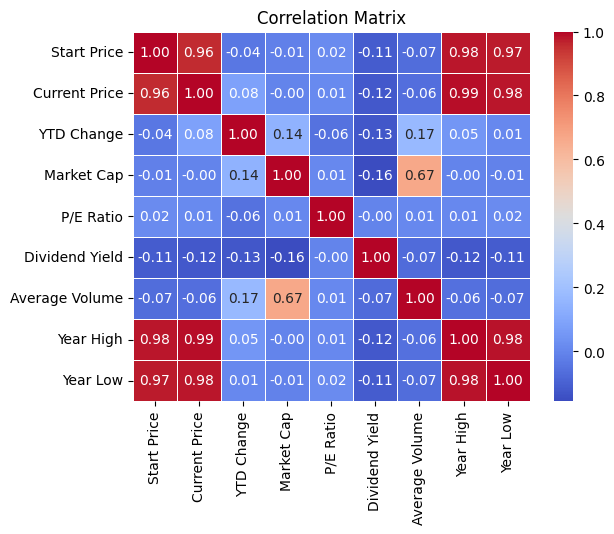

In [12]:
numerical_cols = ['Start Price','Current Price', 'YTD Change', 'Market Cap', 'P/E Ratio', 'Dividend Yield', 'Average Volume','Year High', 'Year Low']
corr_matrix = df[numerical_cols].corr()
plt.figsize= (10,6)
sns.heatmap(corr_matrix, annot = True, cmap ='coolwarm', fmt = ".2f", linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()


## Correlation Matrix Insights
- **Strong Positive Correlations**:
  - `Start Price` and `Current Price` (0.96) suggest stocks tend to maintain relative value over time.
  - `Year High` and `Year Low` both correlate strongly with `Start Price` and `Current Price`, indicating that stocks maintain general trends.

- **Moderate Correlations**:
  - `Market Cap` and `Average Volume` (0.67) suggest that larger companies tend to have higher trading volumes.

- **Weak or Negative Correlations**:
  - `Dividend Yield` shows weak correlation with most metrics, meaning dividend-paying stocks may not have strong ties to stock price changes or market cap.
  - `P/E Ratio` has minimal correlation with other variables, suggesting it behaves independently of price and volume trends.
    - Stock prices tend to **move consistently** over time, with strong historical trends.
### Key Takeaway  
- Stock prices and trading volume are **strongly interconnected**, but valuation and dividend metrics behave more independently. 
- A **multi-metric investment approach** is crucial for making well-informed decisions. 📈🚀  


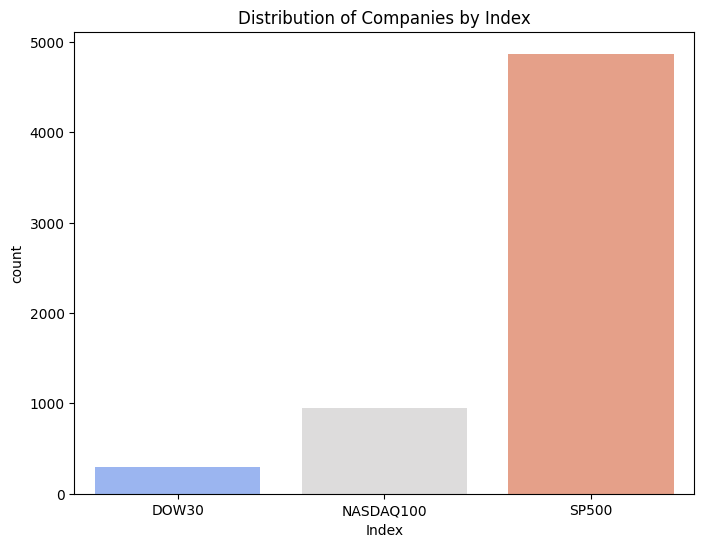

In [63]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Index', data=df, hue='Index', palette='coolwarm', legend=False)
plt.title('Distribution of Companies by Index')
plt.show()

## Distribution of Companies by Index
- The **S&P 500** contains the most companies, dominating the dataset.
- The **NASDAQ 100** holds significantly fewer companies, but it consists of large-cap tech-heavy firms.
- The **Dow 30** includes the fewest companies, as it tracks a small group of blue-chip stocks.

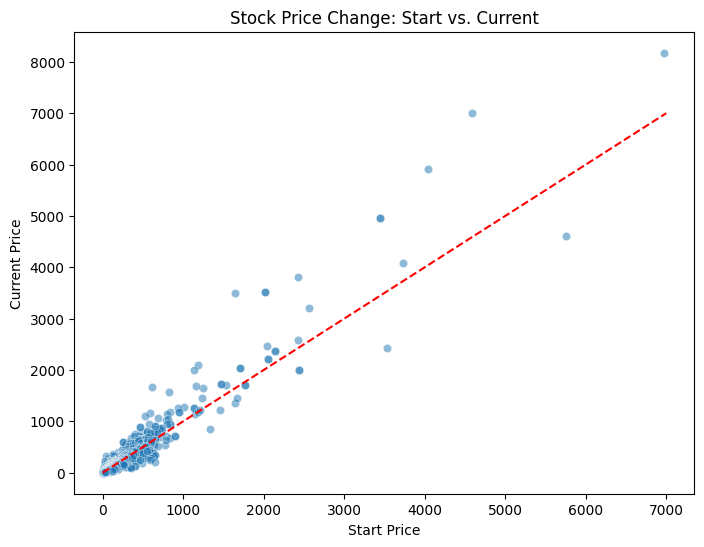

In [69]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Start Price"], y=df["Current Price"], alpha=0.5)
plt.plot([0, 7000], [0, 7000], color="red", linestyle="--")  # 45-degree reference line
plt.xlabel("Start Price")
plt.ylabel("Current Price")
plt.title("Stock Price Change: Start vs. Current")
plt.show()


## Stock price change: Start vs Current
- **Concentration in the Lower Left:** A large number of data points are clustered in the bottom-left corner of the chart. This indicates that many stocks have both low starting prices and low current prices.
- **Outliers:** There are a few notable outliers in the upper-right region of the chart. These represent stocks that had significantly higher starting prices and also have significantly higher current prices. These could be star performers or high-growth stocks.
- **Spread:** The data points are relatively dispersed, suggesting that while there is a general trend, there's also a considerable amount of variability in the price changes. This means that even among stocks with similar starting prices, the current prices can differ quite a bit.
- **Absence of a Perfectly Linear Relationship:** The relationship isn't perfectly linear. If it were, the data points would form a tight line. The scatter suggests other factors beyond just the starting price are influencing the current price.
### Key Takeaways 
- The chart demonstrates a positive relationship between starting and current stock prices, but also highlights the presence of variability and the influence of other factors beyond just the initial price.
- The outliers suggest potential high-growth opportunities, while the concentration in the lower left indicates a large number of stocks with modest price levels.
- The dispersion reinforces the inherent risk and uncertainty in the stock market.

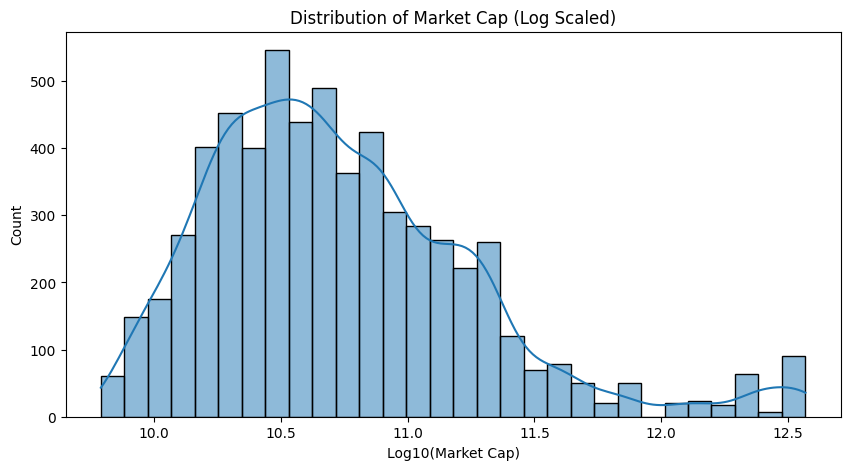

In [70]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log10(df["Market Cap"]), bins=30, kde=True)
plt.xlabel("Log10(Market Cap)")
plt.title("Distribution of Market Cap (Log Scaled)")
plt.show()

## Distribution of Market Cap 
- **Multiple Peaks:** The distribution exhibits multiple peaks, suggesting that companies tend to cluster around specific market cap values. This could indicate different market segments or maturity levels.
- **Skewness:** The distribution appears to be right-skewed, meaning there are more companies with lower market caps and fewer companies with extremely high market caps. This is a common characteristic of market cap distributions.
- **Log Scale Impact:** Using a logarithmic scale for the x-axis helps visualize the distribution across a wide range of market cap values. It compresses the higher values and allows us to see details in the lower market cap ranges.


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7408\3992248888.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_industries.index, x=top_industries.values, palette="coolwarm")


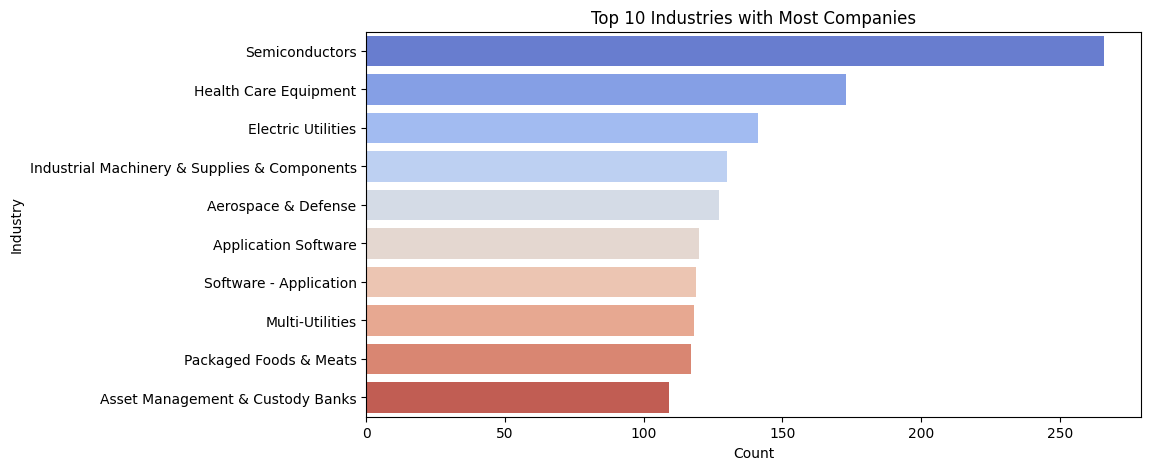

In [71]:
plt.figure(figsize=(10, 5))
top_industries = df["Industry"].value_counts().nlargest(10)
sns.barplot(y=top_industries.index, x=top_industries.values, palette="coolwarm")
plt.xlabel("Count")
plt.title("Top 10 Industries with Most Companies")
plt.show()

## Top 10 industries with Most Companies

* **Semiconductor Dominance:** The semiconductor industry exhibits a significantly higher number of companies compared to all other industries in the top 10. This suggests a strong concentration of businesses within this sector.

* **Tech and Healthcare Strength:** Following semiconductors, the technology sector (Application Software, Software Application) and healthcare (Health Care Equipment) demonstrate a considerable presence. This underscores the importance and scale of these industries.

* **Essential Services Representation:**  The inclusion of Electric Utilities, Multi-Utilities, and Packaged Foods & Meats indicates representation from sectors providing essential services.

* **Industrial and Financial Sectors:** The presence of Industrial Machinery & Supplies & Components and Asset Management & Custody Banks highlights the inclusion of companies from both the industrial and financial domains.

* **Aerospace & Defense Significance:** The appearance of Aerospace & Defense suggests a substantial number of companies operating within this specialized and technologically advanced industry.
### Takeaways
- The bar chart offers a valuable snapshot of industry concentration within the dataset.
- The dominance of semiconductors, along with the strong representation of tech, healthcare, essential services, industrial, and financial sectors, provides key insights.
- Further context regarding the data source, scope, and potential weighting schemes would enhance the analysis and allow for more robust conclusions.